In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

%matplotlib inline

In [60]:
df = pd.read_csv('../recent-grads.csv')

In [61]:
# Drop crap rows
df = df[df.Rank != 74]

In [62]:
# df = ogDf.drop(['Rank', 'Major_code'], axis=1)
# df = ogDf.drop(['Rank', 'Major_code', 'Major', 'Men', 'Women', 'Sample_size'], axis=1)
df.head()

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [63]:
df['Major_category'].value_counts()

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Physical Sciences                      10
Agriculture & Natural Resources        10
Psychology & Social Work                9
Social Science                          9
Arts                                    8
Industrial Arts & Consumer Services     6
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64

In [64]:
# Append these columns to df
oneHotColumns = pd.get_dummies(df.Major_category, prefix='Major_category')
oneHotColumns.head()

,Major_category_Agriculture & Natural Resources,Major_category_Arts,Major_category_Biology & Life Science,Major_category_Business,Major_category_Communications & Journalism,Major_category_Computers & Mathematics,Major_category_Education,Major_category_Engineering,Major_category_Health,Major_category_Humanities & Liberal Arts,Major_category_Industrial Arts & Consumer Services,Major_category_Interdisciplinary,Major_category_Law & Public Policy,Major_category_Physical Sciences,Major_category_Psychology & Social Work,Major_category_Social Science
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


['Major_category_Agriculture & Natural Resources',
 'Major_category_Arts',
 'Major_category_Biology & Life Science',
 'Major_category_Business',
 'Major_category_Communications & Journalism',
 'Major_category_Computers & Mathematics',
 'Major_category_Education',
 'Major_category_Engineering',
 'Major_category_Health',
 'Major_category_Humanities & Liberal Arts',
 'Major_category_Industrial Arts & Consumer Services',
 'Major_category_Interdisciplinary',
 'Major_category_Law & Public Policy',
 'Major_category_Physical Sciences',
 'Major_category_Psychology & Social Work',
 'Major_category_Social Science']

In [65]:
dfWithOneHot = df.join(oneHotColumns)
medianWithOneHot = oneHotColumns.join(df['Median'])
medianWithOneHot.corr()

,Major_category_Agriculture & Natural Resources,Major_category_Arts,Major_category_Biology & Life Science,Major_category_Business,Major_category_Communications & Journalism,Major_category_Computers & Mathematics,Major_category_Education,Major_category_Engineering,Major_category_Health,Major_category_Humanities & Liberal Arts,Major_category_Industrial Arts & Consumer Services,Major_category_Interdisciplinary,Major_category_Law & Public Policy,Major_category_Physical Sciences,Major_category_Psychology & Social Work,Major_category_Social Science,Median
Major_category_Agriculture & Natural Resources,1.000000,-0.054874,-0.073957,-0.071042,-0.038337,-0.064942,-0.079568,-0.111885,-0.068041,-0.076796,-0.047235,-0.019000,-0.042990,-0.061728,-0.058381,-0.058381,-0.070448
Major_category_Arts,-0.054874,1.000000,-0.065744,-0.063153,-0.034080,-0.057731,-0.070733,-0.099461,-0.060486,-0.068268,-0.041990,-0.016890,-0.038216,-0.054874,-0.051898,-0.051898,-0.136518
Major_category_Biology & Life Science,-0.073957,-0.065744,1.000000,-0.085115,-0.045932,-0.077807,-0.095331,-0.134050,-0.081520,-0.092009,-0.056592,-0.022763,-0.051507,-0.073957,-0.069946,-0.069946,-0.096823
Major_category_Business,-0.071042,-0.063153,-0.085115,1.000000,-0.044121,-0.074741,-0.091574,-0.128767,-0.078308,-0.088383,-0.054362,-0.021866,-0.049477,-0.071042,-0.067189,-0.067189,0.084413
Major_category_Communications & Journalism,-0.038337,-0.034080,-0.045932,-0.044121,1.000000,-0.040333,-0.049417,-0.069487,-0.042258,-0.047695,-0.029336,-0.011800,-0.026699,-0.038337,-0.036258,-0.036258,-0.076038
Major_category_Computers & Mathematics,-0.064942,-0.057731,-0.077807,-0.074741,-0.040333,1.000000,-0.083711,-0.117710,-0.071584,-0.080794,-0.049694,-0.019989,-0.045228,-0.064942,-0.061420,-0.061420,0.059093
Major_category_Education,-0.079568,-0.070733,-0.095331,-0.091574,-0.049417,-0.083711,1.000000,-0.144221,-0.087706,-0.098990,-0.060886,-0.024491,-0.055415,-0.079568,-0.075253,-0.075253,-0.217847
Major_category_Engineering,-0.111885,-0.099461,-0.134050,-0.128767,-0.069487,-0.117710,-0.144221,1.000000,-0.123328,-0.139196,-0.085616,-0.034438,-0.077922,-0.111885,-0.105818,-0.105818,0.676483
Major_category_Health,-0.068041,-0.060486,-0.081520,-0.078308,-0.042258,-0.071584,-0.087706,-0.123328,1.000000,-0.084650,-0.052066,-0.020943,-0.047387,-0.068041,-0.064351,-0.064351,-0.079443
Major_category_Humanities & Liberal Arts,-0.076796,-0.068268,-0.092009,-0.088383,-0.047695,-0.080794,-0.098990,-0.139196,-0.084650,1.000000,-0.058765,-0.023637,-0.053484,-0.076796,-0.072631,-0.072631,-0.222024


In [66]:
dfWithOneHot

,Major_category_Agriculture & Natural Resources,Major_category_Arts,Major_category_Biology & Life Science,Major_category_Business,Major_category_Communications & Journalism,Major_category_Computers & Mathematics,Major_category_Education,Major_category_Engineering,Major_category_Health,Major_category_Humanities & Liberal Arts,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,0,0,0,0,0,0,0,1,0,0,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,0,0,0,0,0,0,0,1,0,0,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,0,0,0,0,0,0,0,1,0,0,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,0,0,0,0,0,0,0,1,0,0,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,0,0,0,0,0,0,0,1,0,0,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,0,0,1,0,0,0,0,0,0,0,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,0,0,0,0,0,0,0,0,0,0,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,0,0,0,0,0,0,0,0,0,0,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,0,0,0,0,0,0,0,0,0,0,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


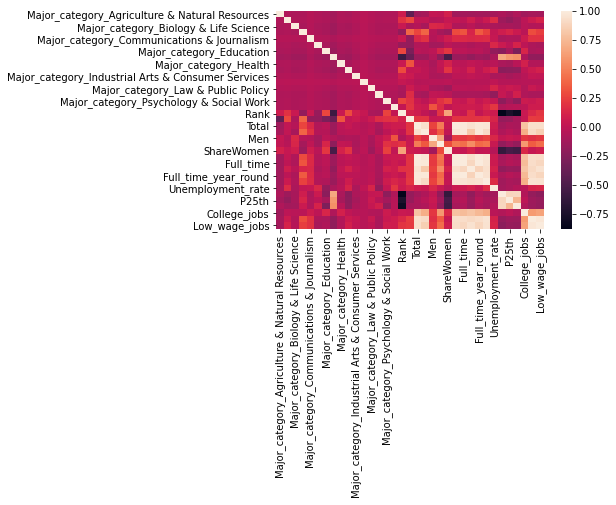

In [67]:
sns.heatmap(dfWithOneHot.corr());

In [68]:
df.describe()

,Rank,Major_code,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.075581,3880.273256,39394.715116,358.127907,16723.877907,22653.656977,0.523090,31374.116279,26179.994186,8883.750000,19808.284884,2430.377907,0.068587,40152.325581,29440.406977,51561.046512,12394.279070,13361.732558,3881.453488
std,50.221266,1692.670105,63468.993551,619.578329,28122.182046,41053.785020,0.231135,50766.623538,42948.847324,14675.322609,33223.830918,4120.646319,0.029967,11503.665592,9157.437674,14923.788658,21341.142889,23837.351017,6958.985234
min,1.000000,1100.000000,609.000000,2.000000,119.000000,0.000000,0.000000,559.000000,488.000000,0.000000,340.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,162.000000,50.000000,0.000000
25%,43.750000,2402.750000,4559.750000,42.000000,2177.500000,1851.500000,0.336026,3734.750000,3181.000000,1037.500000,2474.750000,307.000000,0.050723,33000.000000,24000.000000,42000.000000,1744.750000,1594.000000,342.250000
50%,87.500000,3607.500000,15104.000000,131.000000,5434.000000,8386.500000,0.539560,12031.500000,10073.500000,3332.500000,7436.500000,905.000000,0.068272,36000.000000,27000.000000,47050.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,339.000000,14631.000000,22553.750000,0.703299,31701.250000,25447.250000,9981.000000,17674.750000,2397.000000,0.087599,45000.000000,33000.000000,60000.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,4212.000000,173809.000000,307087.000000,0.968954,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [69]:
oneHotColumns.describe()

,Major_category_Agriculture & Natural Resources,Major_category_Arts,Major_category_Biology & Life Science,Major_category_Business,Major_category_Communications & Journalism,Major_category_Computers & Mathematics,Major_category_Education,Major_category_Engineering,Major_category_Health,Major_category_Humanities & Liberal Arts,Major_category_Industrial Arts & Consumer Services,Major_category_Interdisciplinary,Major_category_Law & Public Policy,Major_category_Physical Sciences,Major_category_Psychology & Social Work,Major_category_Social Science
count,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000
mean,0.05814,0.046512,0.081395,0.075581,0.023256,0.063953,0.093023,0.168605,0.069767,0.087209,0.034884,0.005814,0.029070,0.05814,0.052326,0.052326
std,0.23469,0.211205,0.274240,0.265099,0.151155,0.245384,0.291313,0.375496,0.255498,0.282965,0.184021,0.076249,0.168493,0.23469,0.223333,0.223333
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [70]:
# categorize salary as separate column
df.loc[(df['Median'] >= 20) & (df['Median'] < 30), 'Median_category'] = '20-30'
df.loc[(df['Median'] >= 30) & (df['Median'] < 40), 'Median_category'] = '30-40'
df.loc[(df['Median'] >= 40) & (df['Median'] < 50), 'Median_category'] = '40-50'
df.loc[(df['Median'] >= 50) & (df['Median'] < 60), 'Median_category'] = '50-60'
df.loc[(df['Median'] >= 60) & (df['Median'] < 70), 'Median_category'] = '60-70'
df.loc[(df['Median'] >= 70) & (df['Median'] < 80), 'Median_category'] = '70-80'
df.loc[(df['Median'] >= 80) & (df['Median'] < 90), 'Median_category'] = '80-90'
df.loc[(df['Median'] >= 90) & (df['Median'] < 100), 'Median_category'] = '90-100K'
df.loc[(df['Median'] >= 100) & (df['Median'] < 110), 'Median_category'] = '100-110K'
df.loc[(df['Median'] >= 110) & (df['Median'] < 120), 'Median_category'] = '110-120K'

In [71]:
# add number of majors in each category as separate column
df.loc[df['Major_category'] == 'Engineering', 'Num_majors'] = 29
df.loc[df['Major_category'] == 'Education', 'Num_majors'] = 16
df.loc[df['Major_category'] == 'Humanities & Liberal Arts', 'Num_majors'] = 15
df.loc[df['Major_category'] == 'Biology & Life Science', 'Num_majors'] = 14
df.loc[df['Major_category'] == 'Business', 'Num_majors'] = 13
df.loc[df['Major_category'] == 'Health', 'Num_majors'] = 12
df.loc[df['Major_category'] == 'Computers & Mathematics', 'Num_majors'] = 11
df.loc[df['Major_category'] == 'Agriculture & Natural Resources', 'Num_majors'] = 10
df.loc[df['Major_category'] == 'Physical Sciences', 'Num_majors'] = 10
df.loc[df['Major_category'] == 'Psychology & Social Work', 'Num_majors'] = 9
df.loc[df['Major_category'] == 'Social Science', 'Num_majors'] = 9
df.loc[df['Major_category'] == 'Arts', 'Num_majors'] = 8
df.loc[df['Major_category'] == 'Industrial Arts & Consumer Services', 'Num_majors'] = 7
df.loc[df['Major_category'] == 'Law & Public Policy', 'Num_majors'] = 5
df.loc[df['Major_category'] == 'Communications & Journalism', 'Num_majors'] = 4
df.loc[df['Major_category'] == 'Interdisciplinary', 'Num_majors'] = 1


In [72]:
perc_samp = df['Sample_size']/df['Total']
perc_employed =  df['Employed']/df['Total']
perc_unemployed =  df['Unemployed']/df['Total']
perc_college =  df['College_jobs']/df['Total']
perc_non_college =  df['Non_college_jobs']/df['Total']
perc_low_wage =  df['Low_wage_jobs']/df['Total']

In [73]:
df['Percent_sample_size'] = perc_samp
df['Percent_employed'] = perc_employed
df['Percent_unemployed'] = perc_unemployed
df['Percent_college'] = perc_college
df['Percent_non_college'] = perc_non_college
df['Percent_low_wage'] = perc_low_wage

In [74]:
allData = df.join(oneHotColumns)
# allData.to_csv('recent-grads-new-features.csv')

In [75]:
df.head()

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Non_college_jobs,Low_wage_jobs,Median_category,Num_majors,Percent_sample_size,Percent_employed,Percent_unemployed,Percent_college,Percent_non_college,Percent_low_wage
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,...,364,193,NaN,29.0,0.015391,0.844805,0.015819,0.655836,0.155622,0.082514
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,...,257,50,NaN,29.0,0.009259,0.846561,0.112434,0.462963,0.339947,0.066138
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,...,176,0,NaN,29.0,0.003505,0.757009,0.018692,0.532710,0.205607,0.000000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,758,...,102,0,NaN,29.0,0.012719,0.602544,0.031797,0.420509,0.081081,0.000000
4,5,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,25694,...,4440,972,NaN,29.0,0.008958,0.796466,0.051829,0.567700,0.137632,0.030130


In [76]:
df.corr()

,Rank,Major_code,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,...,College_jobs,Non_college_jobs,Low_wage_jobs,Num_majors,Percent_sample_size,Percent_employed,Percent_unemployed,Percent_college,Percent_non_college,Percent_low_wage
Rank,1.000000,0.108380,0.074054,0.007637,-0.060036,0.202434,0.652781,0.069908,0.033850,0.192502,...,0.051822,0.144001,0.202300,-0.484950,-0.210723,0.030653,0.063733,-0.172262,0.371215,0.525978
Major_code,0.108380,1.000000,0.200389,0.206622,0.036815,0.048352,0.073415,0.200981,0.199447,0.195228,...,0.041080,0.232486,0.225347,-0.393803,-0.139829,-0.098625,0.116908,-0.376165,0.265374,0.253134
Total,0.074054,0.200389,1.000000,0.945557,0.261465,0.480615,0.052446,0.996212,0.989335,0.950243,...,0.800386,0.941228,0.935480,-0.138163,0.025773,0.028960,0.075696,-0.151018,0.045692,0.101052
Sample_size,0.007637,0.206622,0.945557,1.000000,0.173271,0.341695,0.012187,0.964395,0.978356,0.824474,...,0.701128,0.915307,0.860061,-0.141437,0.161587,0.132134,0.075736,-0.189608,0.080128,0.080208
Men,-0.060036,0.036815,0.261465,0.173271,1.000000,0.672724,-0.114052,0.232789,0.230994,0.267929,...,0.214515,0.185977,0.213177,-0.038126,-0.158756,-0.239069,0.091742,-0.065319,-0.113159,-0.012005
Women,0.202434,0.048352,0.480615,0.341695,0.672724,1.000000,0.296029,0.462884,0.427917,0.554060,...,0.610713,0.358184,0.422897,-0.153927,-0.130574,-0.087191,0.021895,0.032994,-0.038974,0.057444
ShareWomen,0.652781,0.073415,0.052446,0.012187,-0.114052,0.296029,1.000000,0.054941,0.031663,0.112868,...,0.150003,0.040455,0.075201,-0.414204,-0.169828,0.074368,-0.034608,0.011678,0.145560,0.289194
Employed,0.069908,0.200981,0.996212,0.964395,0.232789,0.462884,0.054941,1.000000,0.995829,0.934386,...,0.797115,0.941216,0.927088,-0.141613,0.051994,0.067170,0.070681,-0.147498,0.050840,0.098515
Full_time,0.033850,0.199447,0.989335,0.978356,0.230994,0.427917,0.031663,0.995829,1.000000,0.900665,...,0.772050,0.932998,0.904671,-0.127563,0.076315,0.076893,0.067733,-0.153285,0.038985,0.074092
Part_time,0.192502,0.195228,0.950243,0.824474,0.267929,0.554060,0.112868,0.934386,0.900665,1.000000,...,0.804590,0.909461,0.951505,-0.178960,-0.059087,-0.022296,0.096873,-0.142631,0.094640,0.184647


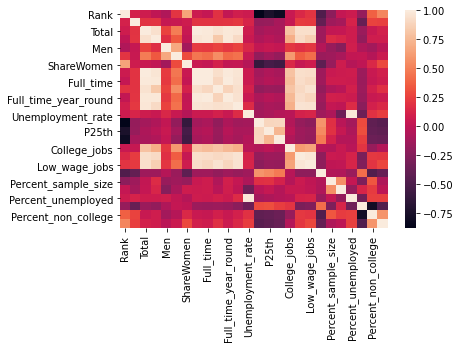

In [77]:
sns.heatmap(df.corr());

In [100]:
oneHotColumnNames = oneHotColumns.columns
oneHotColumnNames

[Index(['Major_category_Agriculture & Natural Resources', 'Major_category_Arts',
        'Major_category_Biology & Life Science', 'Major_category_Business',
        'Major_category_Communications & Journalism',
        'Major_category_Computers & Mathematics', 'Major_category_Education',
        'Major_category_Engineering', 'Major_category_Health',
        'Major_category_Humanities & Liberal Arts',
        'Major_category_Industrial Arts & Consumer Services',
        'Major_category_Interdisciplinary',
        'Major_category_Law & Public Policy',
        'Major_category_Physical Sciences',
        'Major_category_Psychology & Social Work',
        'Major_category_Social Science'],
       dtype='object')]

In [113]:
oneHotColumnNames = oneHotColumns.columns.values.tolist()
SlFeatures = df.join(oneHotColumns)
featureNames = ['Median','Major_category','Percent_low_wage','Percent_college','Percent_non_college','Num_majors','ShareWomen','Women','Part_time','Unemployment_rate','P25th','P75th','Percent_sample_size']
featureNames.extend(oneHotColumnNames)
# print(type(featureNames))
# SlFeatures = df[featureNames]
SlFeatures = SlFeatures[['Median','Major_category','Percent_low_wage','Percent_college','Percent_non_college','Num_majors','ShareWomen','Women','Part_time','Unemployment_rate','P25th','P75th','Percent_sample_size','Major_category_Agriculture & Natural Resources','Major_category_Arts','Major_category_Biology & Life Science','Major_category_Business','Major_category_Communications & Journalism','Major_category_Computers & Mathematics','Major_category_Education','Major_category_Engineering','Major_category_Health','Major_category_Humanities & Liberal Arts','Major_category_Industrial Arts & Consumer Services','Major_category_Interdisciplinary','Major_category_Law & Public Policy','Major_category_Physical Sciences','Major_category_Psychology & Social Work','Major_category_Social Science']]
SlFeatures.head()



,Median,Major_category,Percent_low_wage,Percent_college,Percent_non_college,Num_majors,ShareWomen,Women,Part_time,Unemployment_rate,...,Major_category_Education,Major_category_Engineering,Major_category_Health,Major_category_Humanities & Liberal Arts,Major_category_Industrial Arts & Consumer Services,Major_category_Interdisciplinary,Major_category_Law & Public Policy,Major_category_Physical Sciences,Major_category_Psychology & Social Work,Major_category_Social Science
0,110000,Engineering,0.082514,0.655836,0.155622,29.0,0.120564,282,270,0.018381,...,0,1,0,0,0,0,0,0,0,0
1,75000,Engineering,0.066138,0.462963,0.339947,29.0,0.101852,77,170,0.117241,...,0,1,0,0,0,0,0,0,0,0
2,73000,Engineering,0.000000,0.532710,0.205607,29.0,0.153037,131,133,0.024096,...,0,1,0,0,0,0,0,0,0,0
3,70000,Engineering,0.000000,0.420509,0.081081,29.0,0.107313,135,150,0.050125,...,0,1,0,0,0,0,0,0,0,0
4,65000,Engineering,0.030130,0.567700,0.137632,29.0,0.341631,11021,5180,0.061098,...,0,1,0,0,0,0,0,0,0,0


In [115]:
# SlFeatures.to_csv('SL-recent-grads.csv')

In [78]:
t = df[['Percent_low_wage','Percent_college','Percent_non_college','Full_time','Num_majors','Total','ShareWomen','Women','Employed','Part_time','Unemployment_rate','Unemployed','P25th','P75th','Non_college_jobs','Low_wage_jobs','Percent_sample_size','Percent_unemployed']]
       


In [79]:
t.corr()

,Percent_low_wage,Percent_college,Percent_non_college,Full_time,Num_majors,Total,ShareWomen,Women,Employed,Part_time,Unemployment_rate,Unemployed,P25th,P75th,Non_college_jobs,Low_wage_jobs,Percent_sample_size,Percent_unemployed
Percent_low_wage,1.000000,-0.474181,0.587111,0.074092,-0.381882,0.101052,0.289194,0.057444,0.098515,0.184647,0.244502,0.148479,-0.411372,-0.375306,0.215766,0.276709,-0.066860,0.248596
Percent_college,-0.474181,1.000000,-0.783375,-0.153285,0.427250,-0.151018,0.011678,0.032994,-0.147498,-0.142631,-0.348043,-0.222146,0.308990,0.244307,-0.289107,-0.263931,-0.274938,-0.338803
Percent_non_college,0.587111,-0.783375,1.000000,0.038985,-0.477247,0.045692,0.145560,-0.038974,0.050840,0.094640,0.192164,0.104619,-0.390423,-0.357405,0.217941,0.203553,0.336088,0.246307
Full_time,0.074092,-0.153285,0.038985,1.000000,-0.127563,0.989335,0.031663,0.427917,0.995829,0.900665,0.056298,0.960020,-0.039100,-0.067990,0.932998,0.904671,0.076315,0.067733
Num_majors,-0.381882,0.427250,-0.477247,-0.127563,1.000000,-0.138163,-0.414204,-0.153927,-0.141613,-0.178960,-0.132542,-0.163714,0.540453,0.473616,-0.206662,-0.205151,-0.052897,-0.150485
Total,0.101052,-0.151018,0.045692,0.989335,-0.138163,1.000000,0.052446,0.480615,0.996212,0.950243,0.072919,0.974753,-0.068936,-0.089772,0.941228,0.935480,0.025773,0.075696
ShareWomen,0.289194,0.011678,0.145560,0.031663,-0.414204,0.052446,1.000000,0.296029,0.054941,0.112868,-0.034517,0.026984,-0.527211,-0.556657,0.040455,0.075201,-0.169828,-0.034608
Women,0.057444,0.032994,-0.038974,0.427917,-0.153927,0.480615,0.296029,1.000000,0.462884,0.554060,0.042954,0.438959,-0.115848,-0.171711,0.358184,0.422897,-0.130574,0.021895
Employed,0.098515,-0.147498,0.050840,0.995829,-0.141613,0.996212,0.054941,0.462884,1.000000,0.934386,0.060937,0.968836,-0.063707,-0.090593,0.941216,0.927088,0.051994,0.070681
Part_time,0.184647,-0.142631,0.094640,0.900665,-0.178960,0.950243,0.112868,0.554060,0.934386,1.000000,0.102653,0.944980,-0.150207,-0.161391,0.909461,0.951505,-0.059087,0.096873


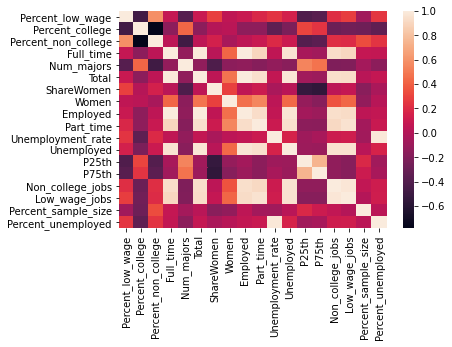

In [80]:
sns.heatmap(t.corr());

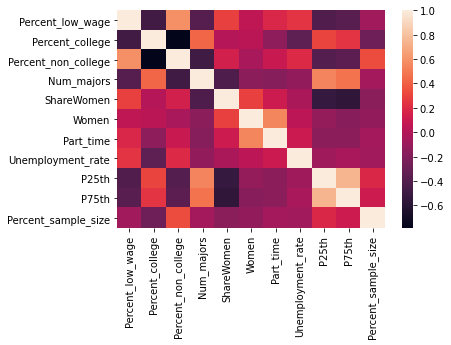

In [81]:
temp = t.drop(['Low_wage_jobs','Non_college_jobs','Total', 'Percent_unemployed', 'Employed', 'Unemployed', 'Full_time'], axis=1)
sns.heatmap(temp.corr());

In [82]:
hi = df.drop(['Low_wage_jobs','Non_college_jobs','Total', 'Percent_unemployed', 'Employed', 'Unemployed', 'Full_time'], axis=1)
hi.corr()

,Rank,Major_code,Sample_size,Men,Women,ShareWomen,Part_time,Full_time_year_round,Unemployment_rate,Median,P25th,P75th,College_jobs,Num_majors,Percent_sample_size,Percent_employed,Percent_college,Percent_non_college,Percent_low_wage
Rank,1.000000,0.108380,0.007637,-0.060036,0.202434,0.652781,0.192502,0.019545,0.066491,-0.873500,-0.736926,-0.805416,0.051822,-0.484950,-0.210723,0.030653,-0.172262,0.371215,0.525978
Major_code,0.108380,1.000000,0.206622,0.036815,0.048352,0.073415,0.195228,0.205684,0.127894,-0.176077,-0.167195,-0.094932,0.041080,-0.393803,-0.139829,-0.098625,-0.376165,0.265374,0.253134
Sample_size,0.007637,0.206622,1.000000,0.173271,0.341695,0.012187,0.824474,0.985207,0.053229,-0.067687,-0.021519,-0.058462,0.701128,-0.141437,0.161587,0.132134,-0.189608,0.080128,0.080208
Men,-0.060036,0.036815,0.173271,1.000000,0.672724,-0.114052,0.267929,0.217415,0.138844,0.022397,0.048842,0.030334,0.214515,-0.038126,-0.158756,-0.239069,-0.065319,-0.113159,-0.012005
Women,0.202434,0.048352,0.341695,0.672724,1.000000,0.296029,0.554060,0.408414,0.042954,-0.185427,-0.115848,-0.171711,0.610713,-0.153927,-0.130574,-0.087191,0.032994,-0.038974,0.057444
ShareWomen,0.652781,0.073415,0.012187,-0.114052,0.296029,1.000000,0.112868,0.022685,-0.034517,-0.615035,-0.527211,-0.556657,0.150003,-0.414204,-0.169828,0.074368,0.011678,0.145560,0.289194
Part_time,0.192502,0.195228,0.824474,0.267929,0.554060,0.112868,1.000000,0.880606,0.102653,-0.190373,-0.150207,-0.161391,0.804590,-0.178960,-0.059087,-0.022296,-0.142631,0.094640,0.184647
Full_time_year_round,0.019545,0.205684,0.985207,0.217415,0.408414,0.022685,0.880606,1.000000,0.050205,-0.073102,-0.029220,-0.059760,0.754764,-0.128474,0.093323,0.090546,-0.158514,0.041480,0.066220
Unemployment_rate,0.066491,0.127894,0.053229,0.138844,0.042954,-0.034517,0.102653,0.050205,1.000000,-0.110655,-0.082641,-0.043631,-0.022515,-0.132542,-0.072087,-0.343489,-0.348043,0.192164,0.244502
Median,-0.873500,-0.176077,-0.067687,0.022397,-0.185427,-0.615035,-0.190373,-0.073102,-0.110655,1.000000,0.895212,0.903435,-0.050370,0.588909,0.183370,-0.019976,0.290162,-0.411857,-0.441099


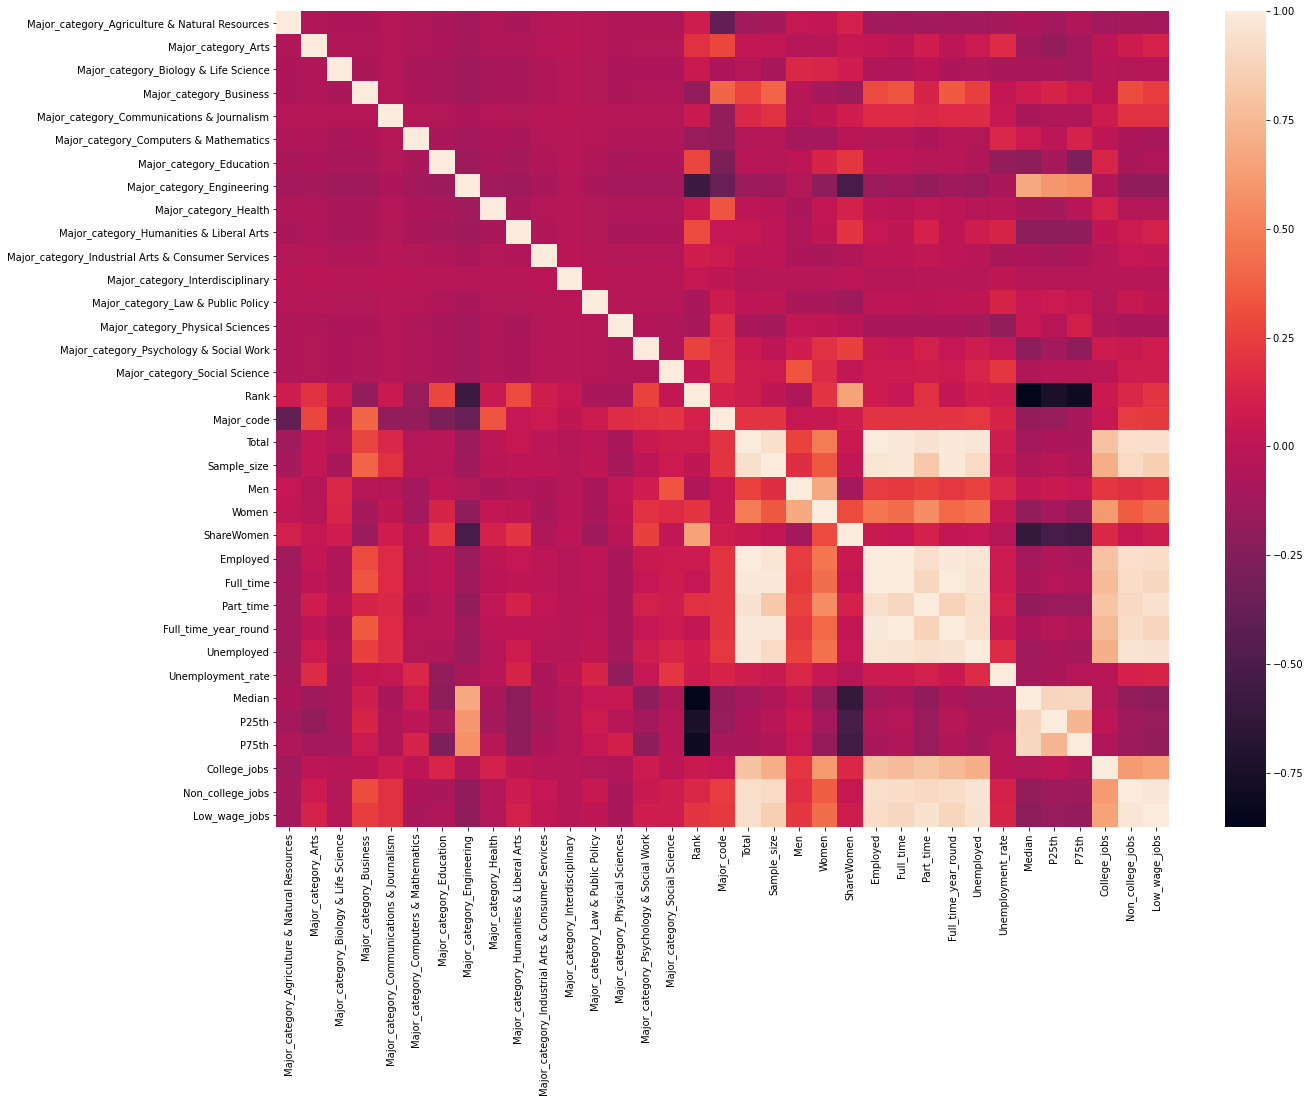

In [83]:
plt.subplots(figsize=(20,15))
svm = sns.heatmap(dfWithOneHot.corr());
figure = svm.get_figure()    
# figure.savefig('svm_conf.png')

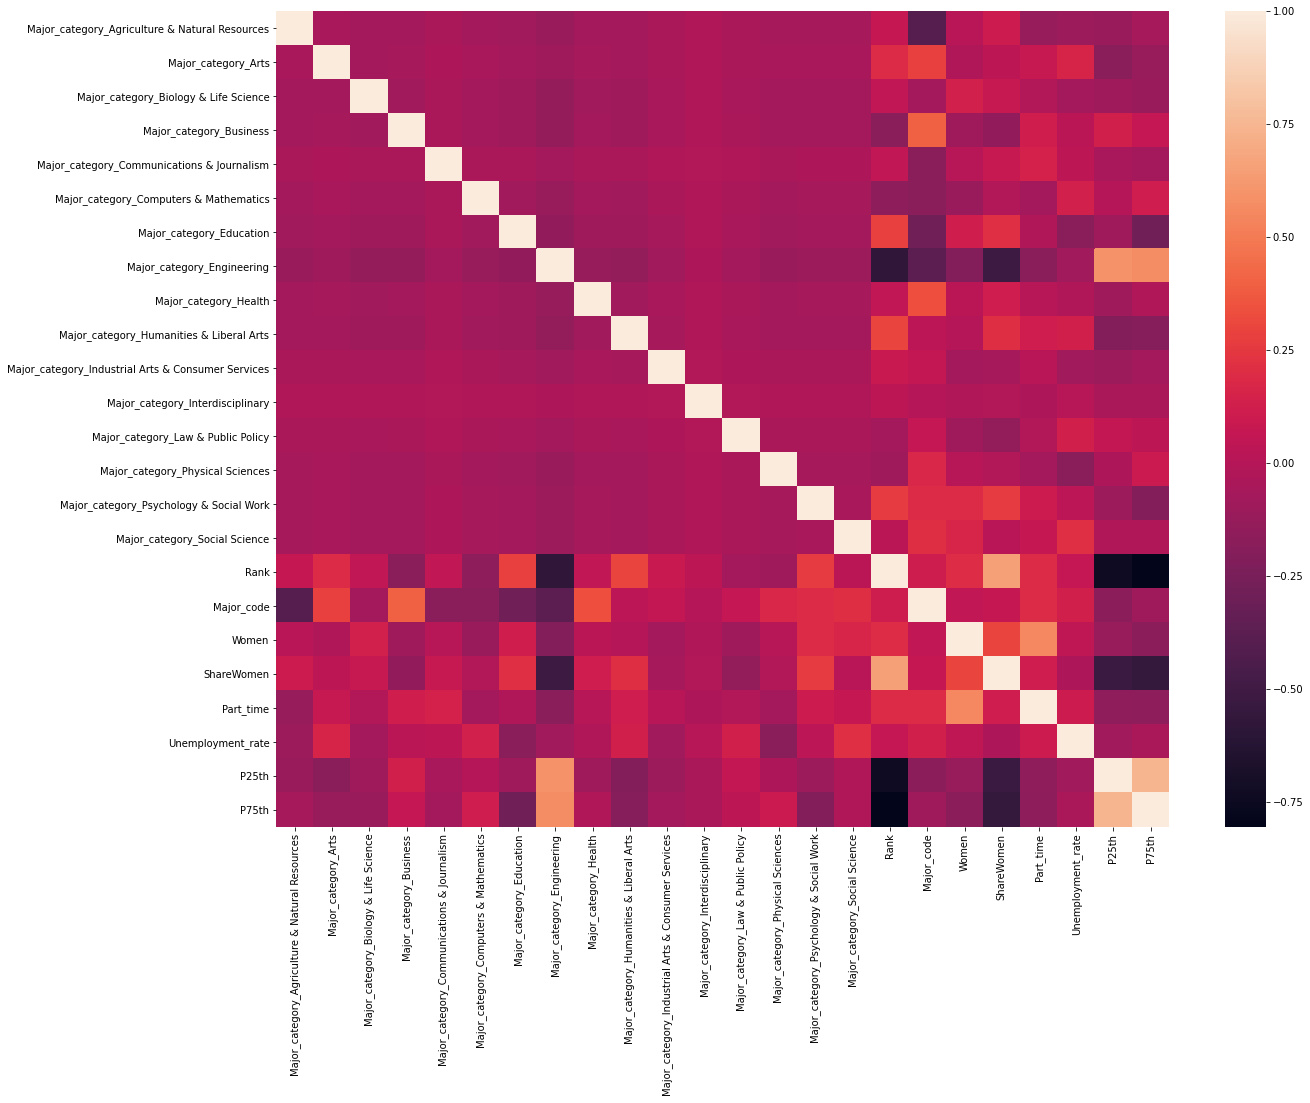

In [84]:
plt.subplots(figsize=(20,15))
temp = dfWithOneHot.drop(['Median','Men','Sample_size','Full_time_year_round','College_jobs','Low_wage_jobs','Non_college_jobs','Total', 'Employed', 'Unemployed', 'Full_time'], axis=1)
sns.heatmap(temp.corr());